In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# csv 파일 Load
import pandas as pd
df = pd.read_csv("/content/datasets_30069_39285_AppleStore.csv")

**Data Preperation**





In [0]:
categorys = {}

# 장르에 고유값(0~22)을 메김
def getCategorys(x):
    if not (x in categorys):
        categorys[x] = len(categorys)

# categorys 배열을 String형으로 변환.
def ReplaceString(x):
    for category in categorys:
        x = x.replace(category,str(categorys[category]))
    return x

# 구간을 2개로 나누었을 때
def DevideRating2(x):
    x2 = (int)(x*2);
    if(x2 >= 8):
        return 1
    else:
        return 0

# 구간을 5개로 나누었을 때
def DevideRating5(x):
    if (int)(x) == 5  :
      return 4
    return (int)(x) 

# 구간을 11개로 나누었을 때
def DevideRating11(x):
    return (int)(x*2)

# String -> Float 함수
# "+"를 "" 으로 변환 / ","를 "" 으로 변환
def StringToFloat(x):
    return float(x.replace("+","").replace(",",""))


In [190]:
df['prime_genre'].apply(getCategorys)
categorys

{'Book': 20,
 'Business': 11,
 'Catalogs': 22,
 'Education': 16,
 'Entertainment': 13,
 'Finance': 5,
 'Food & Drink': 18,
 'Games': 0,
 'Health & Fitness': 12,
 'Lifestyle': 17,
 'Medical': 21,
 'Music': 6,
 'Navigation': 15,
 'News': 19,
 'Photo & Video': 14,
 'Productivity': 1,
 'Reference': 4,
 'Shopping': 3,
 'Social Networking': 9,
 'Sports': 10,
 'Travel': 8,
 'Utilities': 7,
 'Weather': 2}

In [0]:
df_class = df.drop(['track_name','currency','rating_count_ver','user_rating_ver','ver','vpp_lic'], axis = 1)

#Rating을 11구간으로 분할 할 때 과정과 결과

In [192]:
df_class['user_rating'] = df['user_rating'].apply(DevideRating11)
df_class

,Unnamed: 0,id,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,281656475,100788224,3.99,21292,8,4+,Games,38,5,10
1,2,281796108,158578688,0.00,161065,8,4+,Productivity,37,5,23
2,3,281940292,100524032,0.00,188583,7,4+,Weather,37,5,3
3,4,282614216,128512000,0.00,262241,8,12+,Shopping,37,5,9
4,5,282935706,92774400,0.00,985920,9,4+,Reference,37,5,45
...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,126644224,0.00,142,9,4+,Games,38,5,1
7193,11082,1187682390,120760320,0.00,30,9,4+,Games,38,0,1
7194,11087,1187779532,111322112,1.99,15,9,9+,Utilities,37,1,1
7195,11089,1187838770,97235968,0.00,85,9,12+,Games,38,0,2


In [0]:
# String -> Float 함수
# "+"를 "" 으로 변환 / ","를 "" 으로 변환


df_class['cont_rating'] = df_class['cont_rating'].apply(StringToFloat)
#df_class

In [194]:
categorys = {}
def getCategorys(x):
    if not (x in categorys):
        categorys[x] = len(categorys)

df_class['prime_genre'].apply(getCategorys)
categorys
def ReplaceString(x):
    for category in categorys:
        x = x.replace(category, str(categorys[category]))
    return float(x)

df_class['prime_genre'] = df_class['prime_genre'].apply(ReplaceString)

df_class

,Unnamed: 0,id,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,281656475,100788224,3.99,21292,8,4.0,0.0,38,5,10
1,2,281796108,158578688,0.00,161065,8,4.0,1.0,37,5,23
2,3,281940292,100524032,0.00,188583,7,4.0,2.0,37,5,3
3,4,282614216,128512000,0.00,262241,8,12.0,3.0,37,5,9
4,5,282935706,92774400,0.00,985920,9,4.0,4.0,37,5,45
...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,126644224,0.00,142,9,4.0,0.0,38,5,1
7193,11082,1187682390,120760320,0.00,30,9,4.0,0.0,38,0,1
7194,11087,1187779532,111322112,1.99,15,9,9.0,7.0,37,1,1
7195,11089,1187838770,97235968,0.00,85,9,12.0,0.0,38,0,2


In [195]:
df_rating = df_class.loc[:,['user_rating']]
df_class = df_class.drop('user_rating',1)
df_rating

,user_rating
0,8
1,8
2,7
3,8
4,9
...,...
7192,9
7193,9
7194,9
7195,9


In [196]:
df_class

,Unnamed: 0,id,size_bytes,price,rating_count_tot,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,281656475,100788224,3.99,21292,4.0,0.0,38,5,10
1,2,281796108,158578688,0.00,161065,4.0,1.0,37,5,23
2,3,281940292,100524032,0.00,188583,4.0,2.0,37,5,3
3,4,282614216,128512000,0.00,262241,12.0,3.0,37,5,9
4,5,282935706,92774400,0.00,985920,4.0,4.0,37,5,45
...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,126644224,0.00,142,4.0,0.0,38,5,1
7193,11082,1187682390,120760320,0.00,30,4.0,0.0,38,0,1
7194,11087,1187779532,111322112,1.99,15,9.0,7.0,37,1,1
7195,11089,1187838770,97235968,0.00,85,12.0,0.0,38,0,2


**Classification**





In [0]:
# train data, validation data, test data = 8 : 1 : 1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_class, df_rating, test_size = 0.1, random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 1/9, random_state = 1)

In [198]:
from sklearn.tree import DecisionTreeClassifier

#criterion이 gini일 떄,
gtree = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
gtree.fit(x_train, y_train)

print("Gini Criterion\n")
print("Training Set Accuracy: {:.3f}".format(gtree.score(x_train, y_train)))
print("Validation Set Accuracy: {:.3f}\n\n".format(gtree.score(x_val, y_val)))

#criterion이 entropy일 떄,
print("Entropy Criterion\n")
etree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)
etree.fit(x_train, y_train)
Divid11_train=etree.score(x_train, y_train)
Divid11_val=etree.score(x_val, y_val)
print("Training Set Accuracy: {:.3f}".format(etree.score(x_train, y_train)))
print("Validation Set Accuracy: {:.3f}".format(etree.score(x_val, y_val)))

Gini Criterion

Training Set Accuracy: 0.618
Validation Set Accuracy: 0.450


Entropy Criterion

Training Set Accuracy: 0.612
Validation Set Accuracy: 0.486


In [0]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


new_tree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
#깊이를 3까지하고, 표준을 gini로하는 트리 생성
new_tree=new_tree.fit(x_train,y_train)
#생성된 트리에 x_train,y_train data를 넣어서 fit하여 학습

In [200]:
y_train

,user_rating
3939,9
4007,9
1406,9
1607,9
2800,9
...,...
684,9
2371,9
2580,9
6170,9


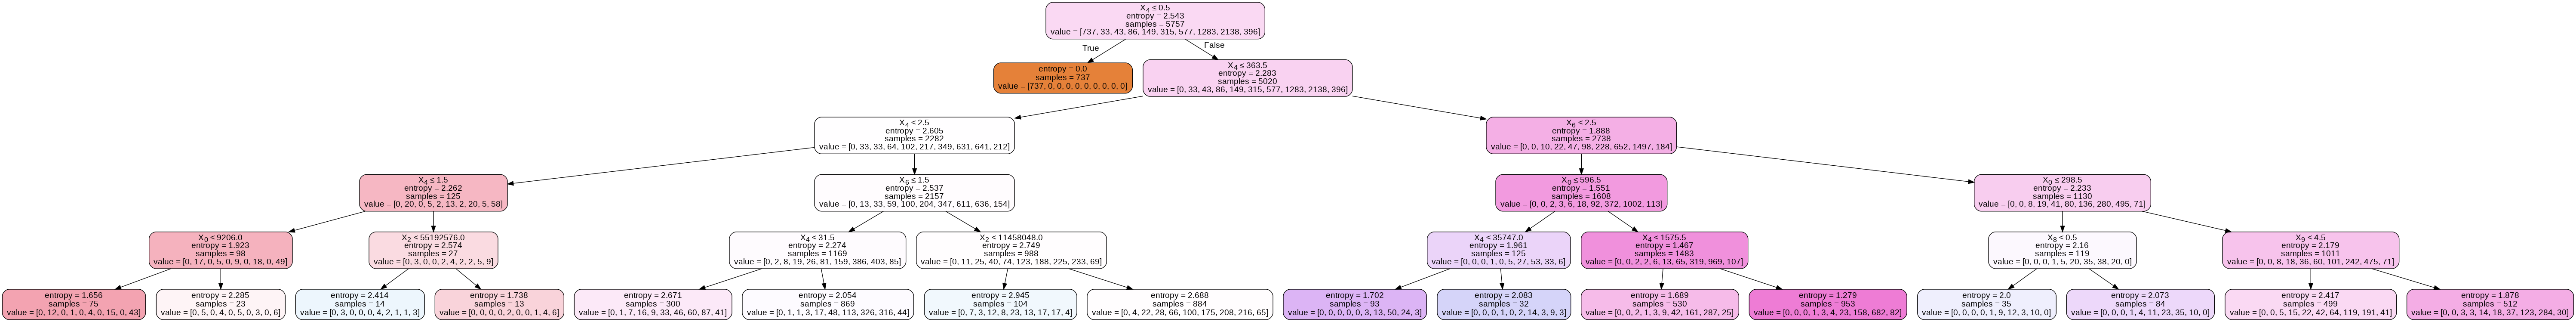

In [201]:
dot_data=export_graphviz(new_tree, out_file=None, filled=True,
                         rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#Rating을 2구간으로 분할 할 때 과정과 결과

In [0]:
import pandas as pd
df = pd.read_csv("/content/datasets_30069_39285_AppleStore.csv")
df['prime_genre'].apply(getCategorys)
df_class = df.drop(['track_name','currency','rating_count_ver','user_rating_ver','ver','vpp_lic'], axis = 1)

In [203]:
df_class['user_rating'] = df['user_rating'].apply(DevideRating2)
df_class

,Unnamed: 0,id,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,281656475,100788224,3.99,21292,1,4+,Games,38,5,10
1,2,281796108,158578688,0.00,161065,1,4+,Productivity,37,5,23
2,3,281940292,100524032,0.00,188583,0,4+,Weather,37,5,3
3,4,282614216,128512000,0.00,262241,1,12+,Shopping,37,5,9
4,5,282935706,92774400,0.00,985920,1,4+,Reference,37,5,45
...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,126644224,0.00,142,1,4+,Games,38,5,1
7193,11082,1187682390,120760320,0.00,30,1,4+,Games,38,0,1
7194,11087,1187779532,111322112,1.99,15,1,9+,Utilities,37,1,1
7195,11089,1187838770,97235968,0.00,85,1,12+,Games,38,0,2


In [204]:
df_class['cont_rating'] = df_class['cont_rating'].apply(StringToFloat)
categorys = {}
def getCategorys(x):
    if not (x in categorys):
        categorys[x] = len(categorys)

df_class['prime_genre'].apply(getCategorys)
categorys
def ReplaceString(x):
    for category in categorys:
        x = x.replace(category, str(categorys[category]))
    return float(x)

df_class['prime_genre'] = df_class['prime_genre'].apply(ReplaceString)

df_class

,Unnamed: 0,id,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,281656475,100788224,3.99,21292,1,4.0,0.0,38,5,10
1,2,281796108,158578688,0.00,161065,1,4.0,1.0,37,5,23
2,3,281940292,100524032,0.00,188583,0,4.0,2.0,37,5,3
3,4,282614216,128512000,0.00,262241,1,12.0,3.0,37,5,9
4,5,282935706,92774400,0.00,985920,1,4.0,4.0,37,5,45
...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,126644224,0.00,142,1,4.0,0.0,38,5,1
7193,11082,1187682390,120760320,0.00,30,1,4.0,0.0,38,0,1
7194,11087,1187779532,111322112,1.99,15,1,9.0,7.0,37,1,1
7195,11089,1187838770,97235968,0.00,85,1,12.0,0.0,38,0,2


In [205]:
df_rating = df_class.loc[:,['user_rating']]
df_class = df_class.drop('user_rating',1)
df_rating

,user_rating
0,1
1,1
2,0
3,1
4,1
...,...
7192,1
7193,1
7194,1
7195,1


In [206]:
# train data, validation data, test data = 8 : 1 : 1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_class, df_rating, test_size = 0.1, random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 1/9, random_state = 1)

from sklearn.tree import DecisionTreeClassifier

#criterion이 gini일 떄,
gtree = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
gtree.fit(x_train, y_train)

print("Gini Criterion\n")
print("Training Set Accuracy: {:.3f}".format(gtree.score(x_train, y_train)))
print("Validation Set Accuracy: {:.3f}\n\n".format(gtree.score(x_val, y_val)))

#criterion이 entropy일 떄,
print("Entropy Criterion\n")
etree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)
etree.fit(x_train, y_train)

Divid2_train=etree.score(x_train, y_train)
Divid2_val=etree.score(x_val, y_val)
print("Training Set Accuracy: {:.3f}".format(etree.score(x_train, y_train)))
print("Validation Set Accuracy: {:.3f}".format(etree.score(x_val, y_val)))

Gini Criterion

Training Set Accuracy: 0.876
Validation Set Accuracy: 0.775


Entropy Criterion

Training Set Accuracy: 0.866
Validation Set Accuracy: 0.776


In [0]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


new_tree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
#깊이를 3까지하고, 표준을 gini로하는 트리 생성
new_tree=new_tree.fit(x_train,y_train)
#생성된 트리에 x_train,y_train data를 넣어서 fit하여 학습

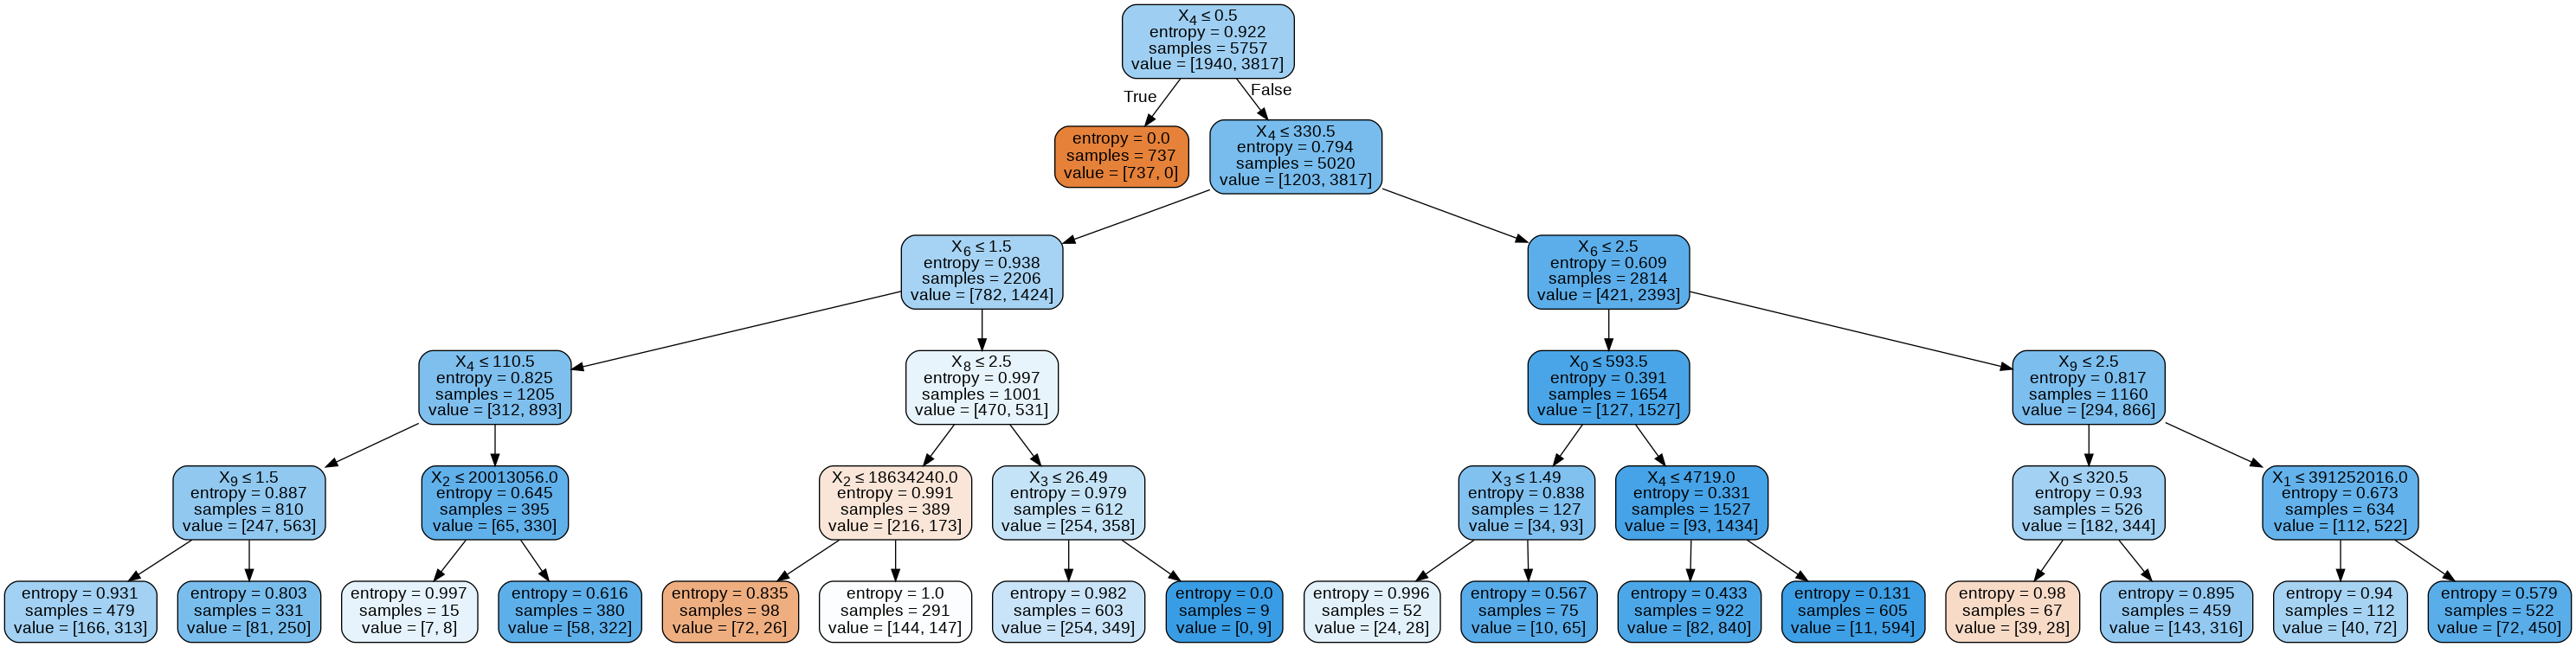

In [208]:
dot_data=export_graphviz(new_tree, out_file=None, filled=True,
                         rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#Rating을 5구간으로 분할 할 때 과정과 결과

In [0]:
import pandas as pd
df = pd.read_csv("/content/datasets_30069_39285_AppleStore.csv")
df['prime_genre'].apply(getCategorys)
df_class = df.drop(['track_name','currency','rating_count_ver','user_rating_ver','ver','vpp_lic'], axis = 1)

In [210]:
df_class['user_rating'] = df['user_rating'].apply(DevideRating5)
df_class

,Unnamed: 0,id,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,281656475,100788224,3.99,21292,4,4+,Games,38,5,10
1,2,281796108,158578688,0.00,161065,4,4+,Productivity,37,5,23
2,3,281940292,100524032,0.00,188583,3,4+,Weather,37,5,3
3,4,282614216,128512000,0.00,262241,4,12+,Shopping,37,5,9
4,5,282935706,92774400,0.00,985920,4,4+,Reference,37,5,45
...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,126644224,0.00,142,4,4+,Games,38,5,1
7193,11082,1187682390,120760320,0.00,30,4,4+,Games,38,0,1
7194,11087,1187779532,111322112,1.99,15,4,9+,Utilities,37,1,1
7195,11089,1187838770,97235968,0.00,85,4,12+,Games,38,0,2


In [211]:
df_class['cont_rating'] = df_class['cont_rating'].apply(StringToFloat)
categorys = {}
def getCategorys(x):
    if not (x in categorys):
        categorys[x] = len(categorys)

df_class['prime_genre'].apply(getCategorys)
categorys
def ReplaceString(x):
    for category in categorys:
        x = x.replace(category, str(categorys[category]))
    return float(x)

df_class['prime_genre'] = df_class['prime_genre'].apply(ReplaceString)

df_class

,Unnamed: 0,id,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,281656475,100788224,3.99,21292,4,4.0,0.0,38,5,10
1,2,281796108,158578688,0.00,161065,4,4.0,1.0,37,5,23
2,3,281940292,100524032,0.00,188583,3,4.0,2.0,37,5,3
3,4,282614216,128512000,0.00,262241,4,12.0,3.0,37,5,9
4,5,282935706,92774400,0.00,985920,4,4.0,4.0,37,5,45
...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,126644224,0.00,142,4,4.0,0.0,38,5,1
7193,11082,1187682390,120760320,0.00,30,4,4.0,0.0,38,0,1
7194,11087,1187779532,111322112,1.99,15,4,9.0,7.0,37,1,1
7195,11089,1187838770,97235968,0.00,85,4,12.0,0.0,38,0,2


In [212]:
df_rating = df_class.loc[:,['user_rating']]
df_class = df_class.drop('user_rating',1)
df_rating

,user_rating
0,4
1,4
2,3
3,4
4,4
...,...
7192,4
7193,4
7194,4
7195,4


In [213]:
# train data, validation data, test data = 8 : 1 : 1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_class, df_rating, test_size = 0.1, random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 1/9, random_state = 1)

from sklearn.tree import DecisionTreeClassifier

#criterion이 gini일 떄,
gtree = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
gtree.fit(x_train, y_train)

print("Gini Criterion\n")
print("Training Set Accuracy: {:.3f}".format(gtree.score(x_train, y_train)))
print("Validation Set Accuracy: {:.3f}\n\n".format(gtree.score(x_val, y_val)))

#criterion이 entropy일 떄,
print("Entropy Criterion\n")
etree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)
etree.fit(x_train, y_train)

Divid5_train=etree.score(x_train, y_train)
Divid5_val=etree.score(x_val, y_val)
print("Training Set Accuracy: {:.3f}".format(etree.score(x_train, y_train)))
print("Validation Set Accuracy: {:.3f}".format(etree.score(x_val, y_val)))

Gini Criterion

Training Set Accuracy: 0.851
Validation Set Accuracy: 0.769


Entropy Criterion

Training Set Accuracy: 0.850
Validation Set Accuracy: 0.775


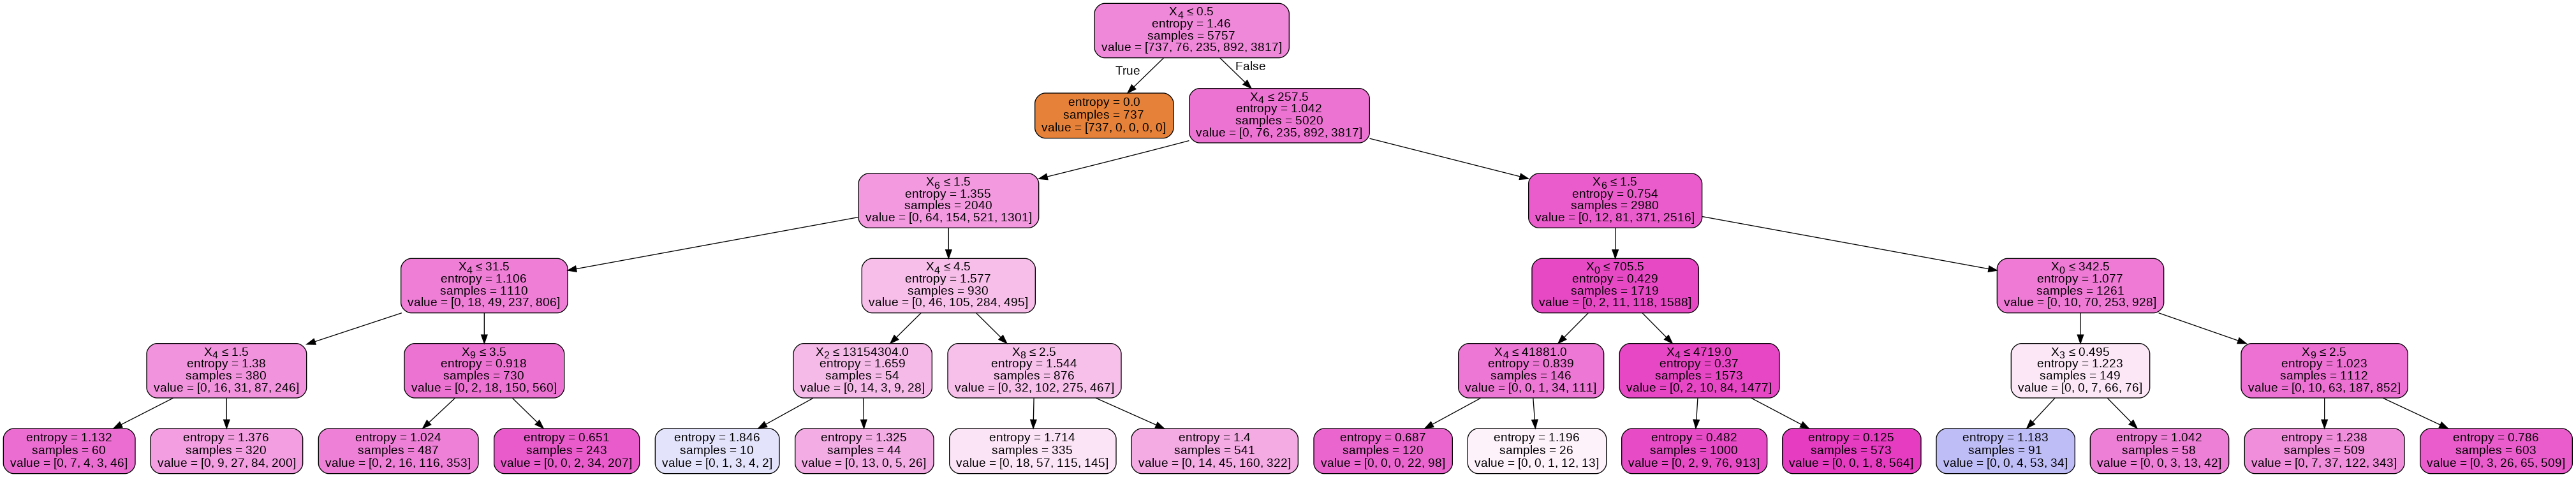

In [214]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


new_tree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
#깊이를 3까지하고, 표준을 gini로하는 트리 생성
new_tree=new_tree.fit(x_train,y_train)
#생성된 트리에 x_train,y_train data를 넣어서 fit하여 학습
dot_data=export_graphviz(new_tree, out_file=None, filled=True,
                         rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Score 정리

In [216]:
print("11개 구간일 때 score\n")
print("Training Set Accuracy: {:.3f}".format(Divid11_train))
print("Validation Set Accuracy: {:.3f}\n".format(Divid11_val))

print("2개 구간일 때 score\n")
print("Training Set Accuracy: {:.3f}".format(Divid2_train))
print("Validation Set Accuracy: {:.3f}\n".format(Divid2_val))

print("5개 구간일 때 score\n")
print("Training Set Accuracy: {:.3f}".format(Divid5_train))
print("Validation Set Accuracy: {:.3f}".format(Divid5_val))

11개 구간일 때 score

Training Set Accuracy: 0.612
Validation Set Accuracy: 0.486

2개 구간일 때 score

Training Set Accuracy: 0.866
Validation Set Accuracy: 0.776

5개 구간일 때 score

Training Set Accuracy: 0.850
Validation Set Accuracy: 0.775
